# Using a Linear Regression Classifier on an Ecommerce Dataset

In this program we will employ a linear regression classifier on a ecommerce dataset to predict the yearly expenditure of a customer based on the length of the customer's memborship, time spent on app, time spent on website, and the average session length. 

We begin by reading the data into a Pandas data frame and checking for missing values.

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.utils import shuffle
import seaborn as sns

df = pd.read_csv('ecommerce_data.csv', engine = 'python', error_bad_lines=False)
# shuffle data
df = shuffle((df))
# check for missing values in df
print(df.isnull().sum())

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64


Skipping line 501: unexpected end of data


In [66]:
# view the data frame
df.head(10)

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
230,apark@walsh-obrien.net,"28942 Bradford Crescent\r\nNew Morganfurt, MD ...",DarkGreen,32.351478,13.105159,35.574842,3.641497,532.935219
98,michael53@munoz.com,USNS Mitchell\r\nFPO AP 92946,MediumBlue,32.288667,12.020112,39.074400,3.911709,507.390062
259,amandastanley@yahoo.com,"38528 Jerry Valleys Suite 027\r\nJonesstad, NY...",CadetBlue,32.096109,10.804891,37.372762,2.699562,375.398455
124,richard81@day.org,"7955 Samantha Walk Suite 230\r\nNorth Luis, IL...",SlateBlue,33.014792,11.761172,37.570164,3.834170,514.336558
260,george02@hotmail.com,"3286 Lynch Field\r\nHenrychester, RI 41833-7902",LightCoral,35.039283,14.426491,37.374184,3.930615,640.187740
135,welchashlee@hotmail.com,"PSC 8159, Box 3254\r\nAPO AP 71071-4890",GreenYellow,33.358398,12.703688,36.100914,2.724108,482.353570
46,gonzaleskatie@gmail.com,"70129 Darrell Spring\r\nThomasmouth, HI 39319-...",Moccasin,34.564558,13.146551,37.335446,3.876875,593.915003
58,rjohns@gmail.com,"264 Derek Dam Apt. 680\r\nWest Danielle, SD 91...",DeepPink,32.843930,11.832286,36.814011,3.471919,496.650708
190,roblessarah@hotmail.com,"022 Taylor Mews Suite 692\r\nHallberg, NJ 53614",MediumSeaGreen,34.713317,12.038808,37.635299,4.632461,612.385230
138,acontreras@hotmail.com,"88995 Edwards Row Suite 456\r\nNorth Jo, DE 02...",Sienna,33.547748,10.735363,37.458375,3.863425,476.191413


In [60]:
# print basic statistics
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,499.000000,499.000000,499.000000,499.000000,499.000000
mean,33.051865,12.051754,37.063029,3.535061,499.317115
std,0.993114,0.995078,1.009848,0.999639,79.394345
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.340848,11.387694,36.353869,2.933598,445.014369
50%,33.078717,11.982045,37.071643,3.535088,499.140152
75%,33.709403,12.755623,37.716878,4.127420,549.496082
max,36.139662,15.126994,40.005182,6.922689,765.518462


We cannot use categorical data in a linear regression model so we must take this account when assigning the features we are going to use. The target variable is the yearly amount spent by a customer.

In [61]:
# target variable is 'Yearly Amount Spent'
y = df['Yearly Amount Spent']
# select feature variables
X = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]

We can generate a correlation matrix to compute and visualise the relationships between the variables. 

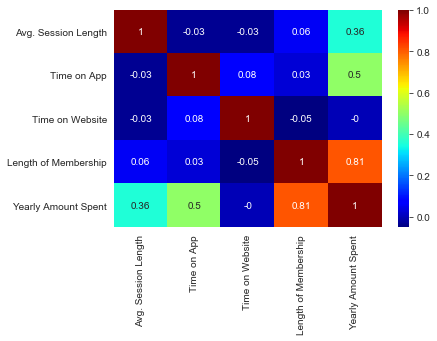

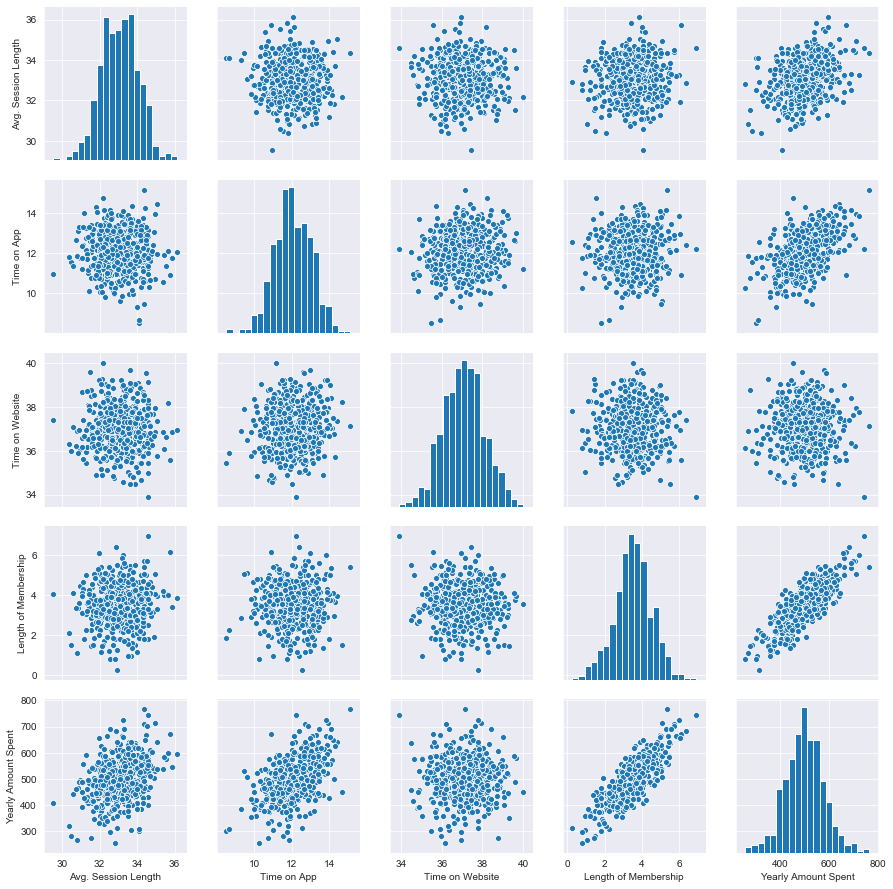

In [62]:
# create a correlation matrix that measures the relationships between the variables
correlation_matrix = df.corr().round(2)
# visualise the matrix
fig = plt.figure()
ax = sns.heatmap(correlation_matrix, annot = True, cmap = 'jet')
# plot pairplot of all features
ax = sns.pairplot(df, diag_kws = {'bins': 20, 'edgecolor': 'white'})

We can see from the plots that the feature most strongly correlated with the yearly amount spent is length of membership. 

The values of the different features vary by a couple of orders of magnitude. We are going to be using regularisation with our model so it is important that we scale the features first. We can do this with StandardScaler which computes the z-score of each sample according to $$Z = \frac{x - \mu}{\sigma}$$ where $x$ is the observed value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.

In [63]:
scaler = StandardScaler()
# apply scaling to features
X_scaled = scaler.fit_transform(X)

We are going to employ a linear regression classifier with ridge regularisation and identify the optimal regularisation parameter $\alpha$. We do this by creating a grid of possible $\alpha$ values and cross-validating classifier performance for each one. 

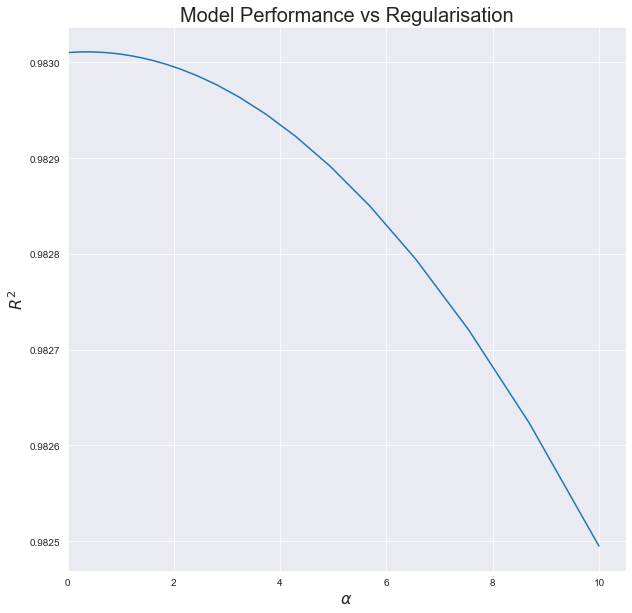

Ridge Regularised Linear Regression
------------------------------------
R^2 = 0.983
alpha = 0.339


In [78]:
# create a range of alphas to test and identify the optimum value
alpha_space = np.logspace(-2, 1, 50)
# lists to score stores
ridge_scores = []
# create a ridge regressor
ridge = Ridge()
# compute ridge scores (R^2 values) over the range of alphas
for alpha in alpha_space:
    # set alpha
    ridge.alpha = alpha
    # perform cross-validation and take the mean score
    ridge_cv = np.mean(cross_val_score(ridge, X, y, cv = 5, scoring = 'r2'))
    # add R^2 to list
    ridge_scores.append(ridge_cv)
  
ridge_scores_array = np.asarray(ridge_scores)
# identify optimal alpha
optimal_alpha = alpha_space[np.argmax(ridge_scores_array)]

# plot R^2 score against alpha
sns.set_style('darkgrid')
fig2 = plt.figure(figsize = (10, 10))
ax2 = fig2.add_subplot(111)
ax2.plot(alpha_space, ridge_scores)
ax2.set_xlim(0,)
ax2.set_xlabel(r'$\alpha$', fontsize = 16)
ax2.set_ylabel(r'$R^2$', fontsize = 16)
ax2.set_title('Model Performance vs Regularisation', fontsize = 20)
plt.show()

print('Ridge Regularised Linear Regression')
print('------------------------------------')
print('R^2 = {:.3f}'.format(max(ridge_scores_array)))
print('alpha = {:.3f}'.format(optimal_alpha))

The model has excellent predictive power. Given a new sample we should be able to very accurately predict the yearly amount the customer will spend from the sample features. Optimal model performance occurs at small values of $\alpha$.

For a multiple linear regression model we should use the adjusted coefficient of determination $\hat{R^2}$, which is defined as $$\hat{R^2} = 1 - (1-R^2)\frac{(n-1)}{(n-p-1)}$$

In [79]:
def adj_r2(r_squared, X):
    n, p = X.shape
    return 1 - (1 - r_squared)*((n - 1)/(n - p - 1))

print('Adjusted R^2 score for multiple linear regression: {:.3f}'.format(adj_r2(max(ridge_scores_array), X_scaled)))

Adjusted R^2 score for multiple linear regression: 0.983
